In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('glddata.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
correlation= data.corr()

<AxesSubplot:>

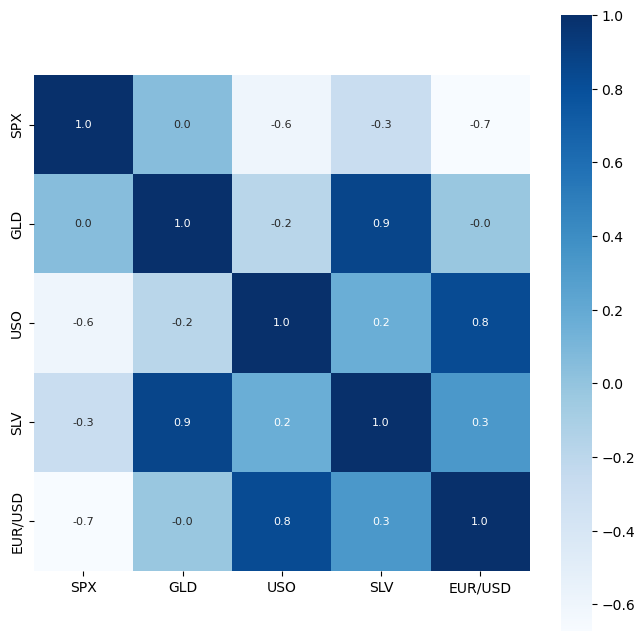

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [9]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

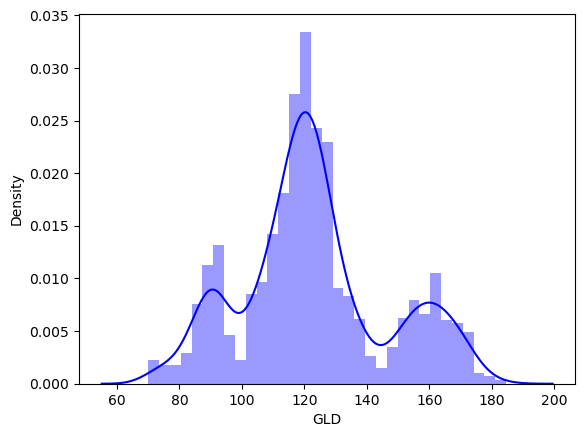

In [10]:
sns.distplot(data["GLD"],color='blue')

In [11]:
x=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

In [12]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [13]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
regressor =RandomForestRegressor(n_estimators=100)

In [16]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [17]:
prediction_test=regressor.predict(x_test)

In [18]:
prediction_test

array([168.73829958,  82.07489991, 115.8914003 , 127.7431008 ,
       120.64800138, 154.7575975 , 150.18059782, 126.15349995,
       117.5379987 , 125.99100073, 116.75250084, 172.30650067,
       141.97489873, 167.85459824, 115.11890007, 117.72510024,
       139.74890267, 170.50920122, 159.71180278, 158.61299852,
       155.05300043, 125.22180027, 176.25729988, 157.51990297,
       125.1967004 ,  93.64899981,  77.76640009, 120.67220009,
       119.10209924, 167.47139982,  88.07410051, 125.2133996 ,
        91.01060034, 117.56270024, 121.06729953, 136.47780078,
       115.70380096, 115.03270093, 148.48670042, 107.40670106,
       104.46800241,  87.3210979 , 126.3843006 , 117.73949997,
       153.46839892, 119.81979991, 108.40860014, 108.12469844,
        93.15190034, 127.08709787,  75.08910042, 113.65999887,
       121.24259999, 111.1884992 , 118.87339926, 120.73089982,
       160.3798998 , 168.57350083, 146.84969661,  85.86399838,
        94.37640043,  86.8867987 ,  90.42970023, 119.02

In [19]:
error_score=metrics.r2_score(y_test,prediction_test)
error_score

0.9892123226609875

In [20]:
test= list(y_test)

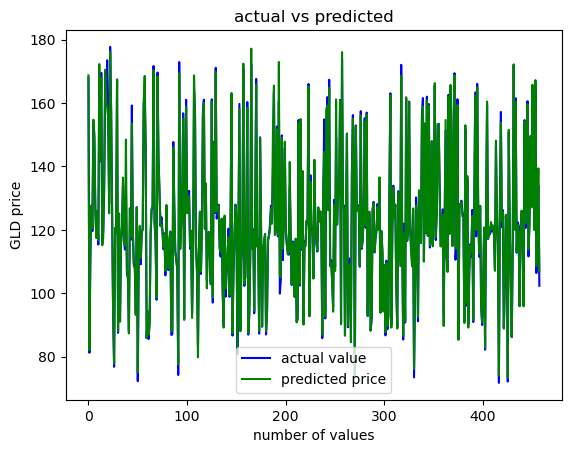

In [22]:
plt.plot(test,color='blue',label='actual value')
plt.plot(prediction_test,color='green',label='predicted price')
plt.title('actual vs predicted')
plt.xlabel("number of values")
plt.ylabel('GLD price')
plt.legend()
plt.show()